In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
from scipy import stats
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('/kaggle/input/superstore-sales/Superstore.csv', encoding="latin1")

In [3]:
df = df.drop_duplicates()

# –ö—Ä–æ–∫ 1: –ê–Ω–∞–ª—ñ–∑ –∫–∞—Ç–µ–≥–æ—Ä—ñ–π–Ω–æ—ó —Å—Ç—Ä—É–∫—Ç—É—Ä–∏

–í–∏–∑–Ω–∞—á–∏–º–æ –≤—Å—ñ —É–Ω—ñ–∫–∞–ª—å–Ω—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó

In [4]:
unique_categories = df['Category'].unique()
print("–£–Ω—ñ–∫–∞–ª—å–Ω—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó:", unique_categories)

–£–Ω—ñ–∫–∞–ª—å–Ω—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó: ['Furniture' 'Office Supplies' 'Technology']


–í–∏–∑–Ω–∞—á–∏–º–æ –≤—Å—ñ –ø—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ—ó –≤ –∫–æ–∂–Ω—ñ–π –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó

In [5]:
subcategories_per_category = df.groupby('Category')['Sub-Category'].unique()
print("–ü—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ—ó –≤ –∫–æ–∂–Ω—ñ–π –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó:\n", subcategories_per_category)

–ü—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ—ó –≤ –∫–æ–∂–Ω—ñ–π –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó:
 Category
Furniture                   [Bookcases, Chairs, Tables, Furnishings]
Office Supplies    [Labels, Storage, Art, Binders, Appliances, Pa...
Technology                  [Phones, Accessories, Machines, Copiers]
Name: Sub-Category, dtype: object


–ü—ñ–¥—Ä–∞—Ö—É–Ω–æ–∫ –∫—ñ–ª—å–∫–æ—Å—Ç—ñ SKU –≤ –∫–æ–∂–Ω—ñ–π –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó —Ç–∞ –ø—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ—ó

In [6]:
sku_counts = df.groupby(['Category', 'Sub-Category'])['Product ID'].nunique().reset_index()
sku_counts.rename(columns={'Product ID': 'SKU Count'}, inplace=True)
print(sku_counts)

           Category Sub-Category  SKU Count
0         Furniture    Bookcases         49
1         Furniture       Chairs         87
2         Furniture  Furnishings        182
3         Furniture       Tables         57
4   Office Supplies   Appliances         98
5   Office Supplies          Art        163
6   Office Supplies      Binders        210
7   Office Supplies    Envelopes         54
8   Office Supplies    Fasteners         43
9   Office Supplies       Labels         70
10  Office Supplies        Paper        276
11  Office Supplies      Storage        131
12  Office Supplies     Supplies         38
13       Technology  Accessories        144
14       Technology      Copiers         13
15       Technology     Machines         63
16       Technology       Phones        184


–í–∏–∑–Ω–∞—á–∏–º–æ –≤–Ω–µ—Å–æ–∫ —É –∑–∞–≥–∞–ª—å–Ω—ñ –ø—Ä–æ–¥–∞–∂—ñ

In [7]:
# –ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –ø—Ä–æ–¥–∞–Ω–∏—Ö –æ–¥–∏–Ω–∏—Ü—å
total_quantity = df['Quantity'].sum()

# –í–Ω–µ—Å–æ–∫ –∫–∞—Ç–µ–≥–æ—Ä—ñ–π
category_contribution = (
    df.groupby('Category')['Quantity']
    .sum()
    .reset_index()
    .assign(Contribution_Percent=lambda x: 100 * x['Quantity'] / total_quantity)
)

# –í–Ω–µ—Å–æ–∫ –ø—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ–π
subcategory_contribution = (
    df.groupby(['Category', 'Sub-Category'])['Quantity']
    .sum()
    .reset_index()
    .assign(Contribution_Percent=lambda x: 100 * x['Quantity'] / total_quantity)
)

print("–í–Ω–µ—Å–æ–∫ –∫–∞—Ç–µ–≥–æ—Ä—ñ–π:\n", category_contribution)
print("\n–í–Ω–µ—Å–æ–∫ –ø—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ–π:\n", subcategory_contribution)

–í–Ω–µ—Å–æ–∫ –∫–∞—Ç–µ–≥–æ—Ä—ñ–π:
           Category  Quantity  Contribution_Percent
0        Furniture      8028             21.197159
1  Office Supplies     22906             60.481082
2       Technology      6939             18.321760

–í–Ω–µ—Å–æ–∫ –ø—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ–π:
            Category Sub-Category  Quantity  Contribution_Percent
0         Furniture    Bookcases       868              2.291870
1         Furniture       Chairs      2356              6.220791
2         Furniture  Furnishings      3563              9.407758
3         Furniture       Tables      1241              3.276741
4   Office Supplies   Appliances      1729              4.565258
5   Office Supplies          Art      3000              7.921210
6   Office Supplies      Binders      5974             15.773770
7   Office Supplies    Envelopes       906              2.392206
8   Office Supplies    Fasteners       914              2.413329
9   Office Supplies       Labels      1400              3.696565
10  Of

# –ö—Ä–æ–∫ 2: –ê–Ω–∞–ª—ñ–∑ —ñ—Å—Ç–æ—Ä–∏—á–Ω–∏—Ö –¥–∞–Ω–∏—Ö

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

–ß–∞—Å—Ç–∫–∞ –∫–æ–∂–Ω–æ—ó –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó –≤ –∑–∞–≥–∞–ª—å–Ω–∏—Ö –ø—Ä–æ–¥–∞–∂–∞—Ö –∑–∞ –æ—Å—Ç–∞–Ω–Ω—ñ –ø–µ—Ä—ñ–æ–¥–∏

In [9]:
df['YearMonth'] = df['Order Date'].dt.to_period('M')

# –ì—Ä—É–ø—É–≤–∞–Ω–Ω—è –∑–∞ –º—ñ—Å—è—Ü–µ–º —ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—î—é
monthly_sales = df.groupby(['YearMonth', 'Category'])['Quantity'].sum().reset_index()

# –î–æ–¥–∞—Ç–∏ –∑–∞–≥–∞–ª—å–Ω—ñ –ø—Ä–æ–¥–∞–∂—ñ –Ω–∞ –º—ñ—Å—è—Ü—å
monthly_total = monthly_sales.groupby('YearMonth')['Quantity'].transform('sum')
monthly_sales['Share'] = monthly_sales['Quantity'] / monthly_total

print(monthly_sales.tail())

    YearMonth         Category  Quantity     Share
139   2014-11  Office Supplies      1071  0.598658
140   2014-11       Technology       375  0.209614
141   2014-12        Furniture       415  0.232754
142   2014-12  Office Supplies      1088  0.610208
143   2014-12       Technology       280  0.157039


–ß–∞—Å—Ç–∫–∞ –∫–æ–∂–Ω–æ—ó –ø—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ—ó –≤ —ó—ó –±–∞—Ç—å–∫—ñ–≤—Å—å–∫—ñ–π –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó

In [10]:
subcategory_sales = df.groupby(['Category', 'Sub-Category'])['Quantity'].sum().reset_index()

# –î–æ–¥–∞—Ç–∏ –∑–∞–≥–∞–ª—å–Ω—ñ –ø—Ä–æ–¥–∞–∂—ñ –¥–ª—è –∫–æ–∂–Ω–æ—ó –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó
category_totals = subcategory_sales.groupby('Category')['Quantity'].transform('sum')
subcategory_sales['Share_in_Category'] = subcategory_sales['Quantity'] / category_totals

print(subcategory_sales)

           Category Sub-Category  Quantity  Share_in_Category
0         Furniture    Bookcases       868           0.108122
1         Furniture       Chairs      2356           0.293473
2         Furniture  Furnishings      3563           0.443822
3         Furniture       Tables      1241           0.154584
4   Office Supplies   Appliances      1729           0.075482
5   Office Supplies          Art      3000           0.130970
6   Office Supplies      Binders      5974           0.260805
7   Office Supplies    Envelopes       906           0.039553
8   Office Supplies    Fasteners       914           0.039902
9   Office Supplies       Labels      1400           0.061119
10  Office Supplies        Paper      5178           0.226054
11  Office Supplies      Storage      3158           0.137868
12  Office Supplies     Supplies       647           0.028246
13       Technology  Accessories      2976           0.428880
14       Technology      Copiers       234           0.033722
15      

In [11]:
sku_sales = df.groupby(['Category', 'Sub-Category', 'Product ID'])['Quantity'].sum().reset_index()

# –î–æ–¥–∞—Ç–∏ –∑–∞–≥–∞–ª—å–Ω—ñ –ø—Ä–æ–¥–∞–∂—ñ –Ω–∞ –ø—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ—é
subcategory_totals = sku_sales.groupby(['Category', 'Sub-Category'])['Quantity'].transform('sum')
sku_sales['Share_in_Subcategory'] = sku_sales['Quantity'] / subcategory_totals

print(sku_sales)


        Category Sub-Category       Product ID  Quantity  Share_in_Subcategory
0      Furniture    Bookcases  FUR-BO-10000112         9              0.010369
1      Furniture    Bookcases  FUR-BO-10000330        10              0.011521
2      Furniture    Bookcases  FUR-BO-10000362        14              0.016129
3      Furniture    Bookcases  FUR-BO-10000468        21              0.024194
4      Furniture    Bookcases  FUR-BO-10000711        12              0.013825
...          ...          ...              ...       ...                   ...
1857  Technology       Phones  TEC-PH-10004912        11              0.003344
1858  Technology       Phones  TEC-PH-10004922        19              0.005777
1859  Technology       Phones  TEC-PH-10004924         8              0.002432
1860  Technology       Phones  TEC-PH-10004959         4              0.001216
1861  Technology       Phones  TEC-PH-10004977        32              0.009729

[1862 rows x 5 columns]


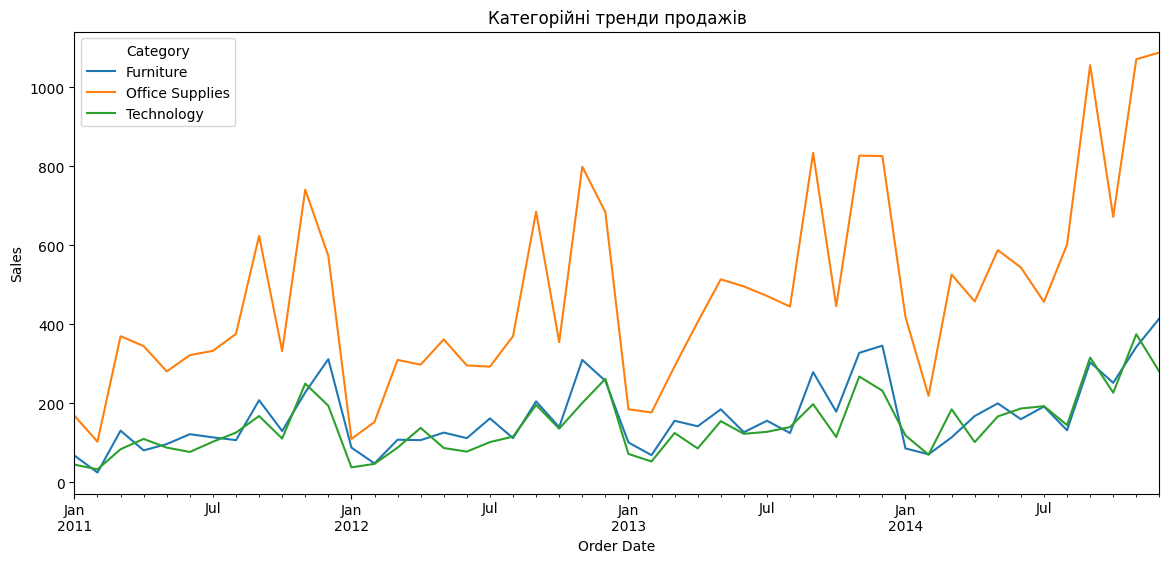

In [12]:
# –ö–∞—Ç–µ–≥–æ—Ä—ñ—ó: –ø–æ–º—ñ—Å—è—á–Ω—ñ –ø—Ä–æ–¥–∞–∂—ñ
category_trends = df.groupby([df['Order Date'].dt.to_period('M'), 'Category'])['Quantity'].sum().unstack().fillna(0)

# –ü–æ–±—É–¥–æ–≤–∞ –≥—Ä–∞—Ñ—ñ–∫—É (–∑–∞ –ø–æ—Ç—Ä–µ–±–∏)
import matplotlib.pyplot as plt
category_trends.plot(figsize=(14, 6), title='–ö–∞—Ç–µ–≥–æ—Ä—ñ–π–Ω—ñ —Ç—Ä–µ–Ω–¥–∏ –ø—Ä–æ–¥–∞–∂—ñ–≤')
plt.ylabel('Sales')
plt.show()


In [13]:
# –°–µ—Ä–µ–¥–Ω—ñ–π –ø—Ä–æ–¥–∞–∂ –ø–æ –º—ñ—Å—è—Ü—è—Ö —É —Ä–æ–∑—Ä—ñ–∑—ñ —Ä–æ–∫—É
df['Month'] = df['Order Date'].dt.month
seasonality = df.groupby(['Category', 'Month'])['Quantity'].mean().reset_index()

print(seasonality)


           Category  Month  Quantity
0         Furniture      1  4.287500
1         Furniture      2  3.276923
2         Furniture      3  3.770370
3         Furniture      4  3.635036
4         Furniture      5  3.973856
5         Furniture      6  3.721429
6         Furniture      7  3.714286
7         Furniture      8  3.777778
8         Furniture      9  3.531915
9         Furniture     10  3.789189
10        Furniture     11  3.813880
11        Furniture     12  3.993994
12  Office Supplies      1  3.789700
13  Office Supplies      2  3.725714
14  Office Supplies      3  3.658537
15  Office Supplies      4  3.666667
16  Office Supplies      5  3.777056
17  Office Supplies      6  3.759637
18  Office Supplies      7  3.792683
19  Office Supplies      8  3.984444
20  Office Supplies      9  3.689735
21  Office Supplies     10  3.800000
22  Office Supplies     11  3.993031
23  Office Supplies     12  3.815884
24       Technology      1  3.702703
25       Technology      2  3.327869
2

# –ó–∞–≥–∞–ª—å–Ω–∏–π –ø—Ä–æ–≥–Ω–æ–∑

In [ ]:
import pandas as pd
data = {
    'Date': [
        '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
        '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
        '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'
    ],
    'Predicted_Quantity': [
        615.464966, 930.078796, 1367.803345, 1517.312378,
        1674.555176, 1665.634766, 1633.679932, 1712.018066,
        1753.078613, 1740.651367, 1768.306763, 1767.003540
    ]
}

sales_pred = pd.DataFrame(data)
sales_pred['Date'] = pd.to_datetime(sales_pred['Date'])

print(sales_pred)


         Date  Predicted_Quantity
0  2015-01-01          615.464966
1  2015-02-01          930.078796
2  2015-03-01         1367.803345
3  2015-04-01         1517.312378
4  2015-05-01         1674.555176
5  2015-06-01         1665.634766
6  2015-07-01         1633.679932
7  2015-08-01         1712.018066
8  2015-09-01         1753.078613
9  2015-10-01         1740.651367
10 2015-11-01         1768.306763
11 2015-12-01         1767.003540


# –ö—Ä–æ–∫ 4: –†–æ–∑–ø–æ–¥—ñ–ª –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó

In [15]:
# –ü—ñ–¥—Ä–∞—Ö—É–Ω–æ–∫ —ñ—Å—Ç–æ—Ä–∏—á–Ω–∏—Ö —á–∞—Å—Ç–æ–∫ –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö
category_shares = df.groupby('Category')['Quantity'].sum()
category_shares = category_shares / category_shares.sum()
print(category_shares)


Category
Furniture          0.211972
Office Supplies    0.604811
Technology         0.183218
Name: Quantity, dtype: float64


In [16]:
# –°—Ç–≤–æ—Ä–∏–º–æ –Ω–æ–≤–∏–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —ñ–∑ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º–∏, —è–∫–∏–π –±—É–¥–µ–º–æ –∑–∞–ø–æ–≤–Ω—é–≤–∞—Ç–∏
category_forecast = []

for _, row in sales_pred.iterrows():
    total = row['Predicted_Quantity']
    date = row['Date']
    for cat, share in category_shares.items():
        category_forecast.append({
            'Date': date,
            'Category': cat,
            'Forecast_Quantity': total * share
        })

category_forecast_df = pd.DataFrame(category_forecast)
print(category_forecast_df)


         Date         Category  Forecast_Quantity
0  2015-01-01        Furniture         130.461087
1  2015-01-01  Office Supplies         372.239868
2  2015-01-01       Technology         112.764011
3  2015-02-01        Furniture         197.150281
4  2015-02-01  Office Supplies         562.521715
5  2015-02-01       Technology         170.406801
6  2015-03-01        Furniture         289.935449
7  2015-03-01  Office Supplies         827.262256
8  2015-03-01       Technology         250.605640
9  2015-04-01        Furniture         321.627116
10 2015-04-01  Office Supplies         917.686936
11 2015-04-01       Technology         277.998326
12 2015-05-01        Furniture         354.958122
13 2015-05-01  Office Supplies        1012.789081
14 2015-05-01       Technology         306.807973
15 2015-06-01        Furniture         353.067248
16 2015-06-01  Office Supplies        1007.393920
17 2015-06-01       Technology         305.173597
18 2015-07-01        Furniture         346.293732


# –ö—Ä–æ–∫ 6: –†–æ–∑–ø–æ–¥—ñ–ª –∫–∞—Ç–µ–≥–æ—Ä—ñ–π –Ω–∞ –ø—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ—ó

In [17]:
# –ì—Ä—É–ø—É–≤–∞–Ω–Ω—è —ñ –æ–±—á–∏—Å–ª–µ–Ω–Ω—è —á–∞—Å—Ç–∫–∏ –ø—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ—ó –≤ –º–µ–∂–∞—Ö —Å–≤–æ—î—ó –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó
subcategory_shares = (
    df.groupby(['Category', 'Sub-Category'])['Quantity']
    .sum()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
)

print(subcategory_shares.head())


Category         Category         Sub-Category
Furniture        Furniture        Bookcases       0.108122
                                  Chairs          0.293473
                                  Furnishings     0.443822
                                  Tables          0.154584
Office Supplies  Office Supplies  Appliances      0.075482
Name: Quantity, dtype: float64


In [18]:
subcategory_forecast = []

for _, row in category_forecast_df.iterrows():
    date = row['Date']
    category = row['Category']
    cat_quantity = row['Forecast_Quantity']
    
    subcats = subcategory_shares.loc[category]
    
    for subcat, share in subcats.items():
        subcategory_forecast.append({
            'Date': date,
            'Category': category,
            'Sub-Category': subcat,
            'Forecast_Quantity': cat_quantity * share
        })

subcategory_forecast_df = pd.DataFrame(subcategory_forecast)
print(subcategory_forecast_df.head())


        Date         Category                   Sub-Category  \
0 2015-01-01        Furniture         (Furniture, Bookcases)   
1 2015-01-01        Furniture            (Furniture, Chairs)   
2 2015-01-01        Furniture       (Furniture, Furnishings)   
3 2015-01-01        Furniture            (Furniture, Tables)   
4 2015-01-01  Office Supplies  (Office Supplies, Appliances)   

   Forecast_Quantity  
0          14.105658  
1          38.286786  
2          57.901452  
3          20.167191  
4          28.097561  


# –ö—Ä–æ–∫ 8: –°–µ–≥–º–µ–Ω—Ç–∞—Ü—ñ—è SKU –≤ –º–µ–∂–∞—Ö –ø—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ–π (XYZ)

In [19]:

# –°—É–º–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤ –∑–∞ –º—ñ—Å—è—Ü—è–º–∏ –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ SKU
sku_monthly = df.groupby(['Sub-Category', 'Product ID', 'Month'])['Quantity'].sum().reset_index()


In [20]:
# –ì—Ä—É–ø—É–≤–∞–Ω–Ω—è –∑–∞ SKU —É –∫–æ–∂–Ω—ñ–π –ø—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ—ó
sku_cv = (
    sku_monthly
    .groupby(['Sub-Category', 'Product ID'])['Quantity']
    .agg(['mean', 'std'])
    .reset_index()
)

sku_cv['cv'] = sku_cv['std'] / sku_cv['mean']


In [21]:
def classify_xyz(cv):
    if cv <= 0.5:
        return 'X'
    elif cv <= 1.0:
        return 'Y'
    else:
        return 'Z'

sku_cv['XYZ_Class'] = sku_cv['cv'].apply(classify_xyz)


In [22]:
xyz_result = sku_cv[['Sub-Category', 'Product ID', 'mean', 'std', 'cv', 'XYZ_Class']]
print(xyz_result.head())


  Sub-Category       Product ID      mean       std        cv XYZ_Class
0  Accessories  TEC-AC-10000023  6.000000  6.733003  1.122167         Z
1  Accessories  TEC-AC-10000057  4.750000  3.095696  0.651725         Y
2  Accessories  TEC-AC-10000109  7.250000  5.123475  0.706686         Y
3  Accessories  TEC-AC-10000158  3.857143  0.899735  0.233265         X
4  Accessories  TEC-AC-10000171  3.000000  0.816497  0.272166         X


# –†–æ–∑–ø–æ–¥—ñ–ª –∑–∞ —Å–µ–≥–º–µ–Ω—Ç–∞–º–∏

In [ ]:
# –û–±—á–∏—Å–ª–µ–Ω–Ω—è —ñ—Å—Ç–æ—Ä–∏—á–Ω–∏—Ö —á–∞—Å—Ç–æ–∫ SKU –≤ –º–µ–∂–∞—Ö –∫–æ–∂–Ω–æ—ó –ø—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ—ó
sku_totals = df.groupby(['Sub-Category', 'Product ID'])['Quantity'].sum().reset_index()

# –†–æ–∑—Ä–∞—Ö—É–Ω–æ–∫ –∑–∞–≥–∞–ª—å–Ω–æ—ó –∫—ñ–ª—å–∫–æ—Å—Ç—ñ –ø–æ –ø—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ—ó
subcategory_totals = sku_totals.groupby('Sub-Category')['Quantity'].transform('sum')

# –†–æ–∑—Ä–∞—Ö—É–Ω–æ–∫ —á–∞—Å—Ç–∫–∏ –∫–æ–∂–Ω–æ–≥–æ SKU
sku_totals['Historical_Share'] = sku_totals['Quantity'] / subcategory_totals

# –ó–∞–ª–∏—à–∞—î–º–æ —Ç—ñ–ª—å–∫–∏ –ø–æ—Ç—Ä—ñ–±–Ω—ñ —Å—Ç–æ–≤–ø—Ü—ñ
sku_shares = sku_totals[['Sub-Category', 'Product ID', 'Historical_Share']]

# –û–±'—î–¥–Ω–∞–Ω–Ω—è –∑ XYZ –∞–Ω–∞–ª—ñ–∑–æ–º
sku_shares_xyz = sku_shares.merge(
    xyz_result[['Sub-Category', 'Product ID', 'XYZ_Class']], 
    on=['Sub-Category', 'Product ID'], 
    how='left'
)

print("SKU —á–∞—Å—Ç–∫–∏ –∑ XYZ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—î—é:")
print(sku_shares_xyz.head())

# –§—É–Ω–∫—Ü—ñ—è –¥–ª—è –∫–æ—Ä–∏–≥—É–≤–∞–Ω–Ω—è –ø—Ä–æ–≥–Ω–æ–∑—É –Ω–∞ –æ—Å–Ω–æ–≤—ñ XYZ –∫–ª–∞—Å—É
def adjust_forecast_by_xyz(forecast_qty, xyz_class, base_share):
    if xyz_class == 'X':
        # –î–ª—è —Å—Ç–∞–±—ñ–ª—å–Ω–∏—Ö —Ç–æ–≤–∞—Ä—ñ–≤ –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î–º–æ —ñ—Å—Ç–æ—Ä–∏—á–Ω—É —á–∞—Å—Ç–∫—É –∑ –º—ñ–Ω—ñ–º–∞–ª—å–Ω–∏–º–∏ –∑–º—ñ–Ω–∞–º–∏
        adjustment_factor = 1.0
    elif xyz_class == 'Y':
        # –î–ª—è –ø–æ–º—ñ—Ä–Ω–æ –≤–∞—Ä—ñ–∞—Ç–∏–≤–Ω–∏—Ö —Ç–æ–≤–∞—Ä—ñ–≤ —Ç—Ä–æ—Ö–∏ –∑–º–µ–Ω—à—É—î–º–æ —á–∞—Å—Ç–∫—É
        adjustment_factor = 0.95
    else:  # Z –∫–ª–∞—Å—Å
        # –î–ª—è –≤–∏—Å–æ–∫–æ–≤–∞—Ä—ñ–∞—Ç–∏–≤–Ω–∏—Ö —Ç–æ–≤–∞—Ä—ñ–≤ –∑–Ω–∞—á–Ω–æ –∑–º–µ–Ω—à—É—î–º–æ —á–∞—Å—Ç–∫—É (–∫–æ–Ω—Å–µ—Ä–≤–∞—Ç–∏–≤–Ω–∏–π –ø—ñ–¥—Ö—ñ–¥)
        adjustment_factor = 0.85
    
    return forecast_qty * base_share * adjustment_factor

# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è —Ñ—ñ–Ω–∞–ª—å–Ω–æ–≥–æ –ø—Ä–æ–≥–Ω–æ–∑—É –ø–æ SKU
sku_forecast = []

for _, subcat_row in subcategory_forecast_df.iterrows():
    date = subcat_row['Date']
    category = subcat_row['Category']
    subcategory = subcat_row['Sub-Category']
    subcat_quantity = subcat_row['Forecast_Quantity']
    
    # –û—Ç—Ä–∏–º—É—î–º–æ –≤—Å—ñ SKU –¥–ª—è —Ü—ñ—î—ó –ø—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ—ó
    subcat_skus = sku_shares_xyz[sku_shares_xyz['Sub-Category'] == subcategory].copy()
    
    if len(subcat_skus) > 0:
        # –†–æ–∑—Ä–∞—Ö–æ–≤—É—î–º–æ —Å–∫–æ—Ä–∏–≥–æ–≤–∞–Ω—ñ —á–∞—Å—Ç–∫–∏
        subcat_skus['Adjusted_Share'] = subcat_skus.apply(
            lambda row: adjust_forecast_by_xyz(1.0, row['XYZ_Class'], row['Historical_Share']), 
            axis=1
        )
        
        # –ù–æ—Ä–º–∞–ª—ñ–∑—É—î–º–æ —á–∞—Å—Ç–∫–∏, —â–æ–± —ó—Ö —Å—É–º–∞ –¥–æ—Ä—ñ–≤–Ω—é–≤–∞–ª–∞ 1
        total_adjusted_share = subcat_skus['Adjusted_Share'].sum()
        subcat_skus['Normalized_Share'] = subcat_skus['Adjusted_Share'] / total_adjusted_share
        
        # –†–æ–∑–ø–æ–¥—ñ–ª—è—î–º–æ –ø—Ä–æ–≥–Ω–æ–∑
        for _, sku_row in subcat_skus.iterrows():
            sku_forecast.append({
                'Date': date,
                'Category': category,
                'Sub-Category': subcategory,
                'Product_ID': sku_row['Product ID'],
                'XYZ_Class': sku_row['XYZ_Class'],
                'Historical_Share': sku_row['Historical_Share'],
                'Adjusted_Share': sku_row['Normalized_Share'],
                'Forecast_Quantity': subcat_quantity * sku_row['Normalized_Share']
            })

sku_forecast_df = pd.DataFrame(sku_forecast)

print("\n–ü—Ä–æ–≥–Ω–æ–∑ –ø–æ SKU –∑ —É—Ä–∞—Ö—É–≤–∞–Ω–Ω—è–º XYZ –∞–Ω–∞–ª—ñ–∑—É:")
print(sku_forecast_df.head(20))

# –ê–Ω–∞–ª—ñ–∑ —Ä–æ–∑–ø–æ–¥—ñ–ª—É –ø—Ä–æ–≥–Ω–æ–∑—É –ø–æ XYZ –∫–ª–∞—Å–∞—Ö
xyz_analysis = (
    sku_forecast_df.groupby(['Date', 'XYZ_Class'])['Forecast_Quantity']
    .sum()
    .reset_index()
)

xyz_monthly_totals = xyz_analysis.groupby('Date')['Forecast_Quantity'].transform('sum')
xyz_analysis['Share_by_XYZ'] = xyz_analysis['Forecast_Quantity'] / xyz_monthly_totals

print("\n–†–æ–∑–ø–æ–¥—ñ–ª –ø—Ä–æ–≥–Ω–æ–∑—É –ø–æ XYZ –∫–ª–∞—Å–∞—Ö:")
print(xyz_analysis)

# –ü–µ—Ä–µ–≤—ñ—Ä–∫–∞: –∑–∞–≥–∞–ª—å–Ω–∞ —Å—É–º–∞ –ø—Ä–æ–≥–Ω–æ–∑—ñ–≤ SKU –º–∞—î –¥–æ—Ä—ñ–≤–Ω—é–≤–∞—Ç–∏ –ø–æ—á–∞—Ç–∫–æ–≤–æ–º—É –ø—Ä–æ–≥–Ω–æ–∑—É
total_check = sku_forecast_df.groupby('Date')['Forecast_Quantity'].sum().reset_index()
total_check = total_check.merge(sales_pred, on='Date', how='left')
total_check['Difference'] = total_check['Forecast_Quantity'] - total_check['Predicted_Quantity']

print("\n–ü–µ—Ä–µ–≤—ñ—Ä–∫–∞ –±–∞–ª–∞–Ω—Å—É –ø—Ä–æ–≥–Ω–æ–∑—ñ–≤:")
print(total_check)

# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è –∑–≤–µ–¥–µ–Ω–æ—ó —Ç–∞–±–ª–∏—Ü—ñ –¥–ª—è –∞–Ω–∞–ª—ñ–∑—É
pivot_xyz = sku_forecast_df.pivot_table(
    index=['Category', 'Sub-Category', 'Product_ID', 'XYZ_Class'],
    columns='Date',
    values='Forecast_Quantity',
    fill_value=0
).reset_index()

print("\n–ó–≤–µ–¥–µ–Ω–∞ —Ç–∞–±–ª–∏—Ü—è –ø—Ä–æ–≥–Ω–æ–∑—ñ–≤ –ø–æ SKU:")
print(pivot_xyz.head())

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ XYZ –∫–ª–∞—Å–∞—Ö
xyz_stats = (
    sku_forecast_df.groupby('XYZ_Class')
    .agg({
        'Product_ID': 'nunique',
        'Forecast_Quantity': ['sum', 'mean', 'std']
    })
    .round(2)
)

print("\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ XYZ –∫–ª–∞—Å–∞—Ö:")
print(xyz_stats)

SKU —á–∞—Å—Ç–∫–∏ –∑ XYZ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—î—é:
  Sub-Category       Product ID  Historical_Share XYZ_Class
0  Accessories  TEC-AC-10000023          0.008065         Z
1  Accessories  TEC-AC-10000057          0.006384         Y
2  Accessories  TEC-AC-10000109          0.009745         Y
3  Accessories  TEC-AC-10000158          0.009073         X
4  Accessories  TEC-AC-10000171          0.004032         X

–ü—Ä–æ–≥–Ω–æ–∑ –ø–æ SKU –∑ —É—Ä–∞—Ö—É–≤–∞–Ω–Ω—è–º XYZ –∞–Ω–∞–ª—ñ–∑—É:
         Date   Category Sub-Category       Product_ID XYZ_Class  \
0  2015-01-01  Furniture    Bookcases  FUR-BO-10000112         Z   
1  2015-01-01  Furniture    Bookcases  FUR-BO-10000330         X   
2  2015-01-01  Furniture    Bookcases  FUR-BO-10000362         Y   
3  2015-01-01  Furniture    Bookcases  FUR-BO-10000468         Y   
4  2015-01-01  Furniture    Bookcases  FUR-BO-10000711         Y   
5  2015-01-01  Furniture    Bookcases  FUR-BO-10000780         Y   
6  2015-01-01  Furniture    Bookcases  FU

In [ ]:
# ===================== –†–û–ó–†–ê–•–£–ù–û–ö –ú–ï–¢–†–ò–ö –£–ü–†–ê–í–õ–Ü–ù–ù–Ø –ó–ê–ü–ê–°–ê–ú–ò =====================

# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è –¥–∞—Ç–∞—Ñ—Ä–µ–π–º—É –∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –¥–ª—è —Ä–æ–∑—Ä–∞—Ö—É–Ω–∫—É –º–µ—Ç—Ä–∏–∫ (–ª–µ–≥–∫–æ —Ä–µ–¥–∞–≥—É–≤–∞—Ç–∏)
inventory_params = pd.DataFrame({
    'XYZ_Class': ['X', 'Y', 'Z'],
    'Lead_Time_Days': [7, 10, 14],  # –ß–∞—Å –ø–æ—Å—Ç–∞–≤–∫–∏ –≤ –¥–Ω—è—Ö
    'Service_Level': [0.95, 0.90, 0.85],  # –†—ñ–≤–µ–Ω—å —Å–µ—Ä–≤—ñ—Å—É (95%, 90%, 85%)
    'Ordering_Cost': [50, 75, 100],  # –í–∞—Ä—Ç—ñ—Å—Ç—å –æ—Ñ–æ—Ä–º–ª–µ–Ω–Ω—è –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è
    'Holding_Cost_Rate': [0.20, 0.25, 0.30],  # –í—ñ–¥—Å–æ—Ç–æ–∫ –≤—ñ–¥ –≤–∞—Ä—Ç–æ—Å—Ç—ñ —Ç–æ–≤–∞—Ä—É –Ω–∞ —Ä—ñ–∫
    'Unit_Cost': [25, 30, 35],  # –°–µ—Ä–µ–¥–Ω—è —Å–æ–±—ñ–≤–∞—Ä—Ç—ñ—Å—Ç—å –æ–¥–∏–Ω–∏—Ü—ñ —Ç–æ–≤–∞—Ä—É
    'Safety_Stock_Days': [7, 14, 21]  # –ö—ñ–ª—å–∫—ñ—Å—Ç—å –¥–Ω—ñ–≤ –¥–ª—è —Å—Ç—Ä–∞—Ö–æ–≤–æ–≥–æ –∑–∞–ø–∞—Å—É
})

print("\n=== –ü–ê–†–ê–ú–ï–¢–†–ò –î–õ–Ø –†–û–ó–†–ê–•–£–ù–ö–£ –ú–ï–¢–†–ò–ö –£–ü–†–ê–í–õ–Ü–ù–ù–Ø –ó–ê–ü–ê–°–ê–ú–ò ===")
print(inventory_params)

# –§—É–Ω–∫—Ü—ñ—è –¥–ª—è —Ä–æ–∑—Ä–∞—Ö—É–Ω–∫—É z-score –¥–ª—è –∑–∞–¥–∞–Ω–æ–≥–æ —Ä—ñ–≤–Ω—è —Å–µ—Ä–≤—ñ—Å—É
from scipy import stats

def get_z_score(service_level):
    return stats.norm.ppf(service_level)

# –î–æ–¥–∞—î–º–æ z-score –¥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤
inventory_params['Z_Score'] = inventory_params['Service_Level'].apply(get_z_score)

# –†–æ–∑—Ä–∞—Ö—É–Ω–æ–∫ —Ä—ñ—á–Ω–æ–≥–æ –ø–æ–ø–∏—Ç—É –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ SKU
annual_demand = sku_forecast_df.groupby(['Category', 'Sub-Category', 'Product_ID', 'XYZ_Class'])['Forecast_Quantity'].sum().reset_index()
annual_demand.rename(columns={'Forecast_Quantity': 'Annual_Demand'}, inplace=True)

# –†–æ–∑—Ä–∞—Ö—É–Ω–æ–∫ —Å–µ—Ä–µ–¥–Ω—å–æ–¥–µ–Ω–Ω–æ–≥–æ –ø–æ–ø–∏—Ç—É —Ç–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è
daily_demand_stats = (
    sku_forecast_df.groupby(['Category', 'Sub-Category', 'Product_ID', 'XYZ_Class'])['Forecast_Quantity']
    .agg(['mean', 'std'])
    .reset_index()
)
daily_demand_stats.columns = ['Category', 'Sub-Category', 'Product_ID', 'XYZ_Class', 'Daily_Demand_Mean', 'Daily_Demand_Std']

# –ó–∞–ø–æ–≤–Ω–µ–Ω–Ω—è NaN –∑–Ω–∞—á–µ–Ω—å –¥–ª—è —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è (–¥–ª—è –≤–∏–ø–∞–¥–∫—ñ–≤ –∑ –æ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–Ω—è–º)
daily_demand_stats['Daily_Demand_Std'] = daily_demand_stats['Daily_Demand_Std'].fillna(
    daily_demand_stats['Daily_Demand_Mean'] * 0.1  # –ü—Ä–∏–ø—É—Å–∫–∞—î–º–æ 10% –≤—ñ–¥ —Å–µ—Ä–µ–¥–Ω—å–æ–≥–æ
)

# –û–±'—î–¥–Ω–∞–Ω–Ω—è –≤—Å—ñ—Ö –¥–∞–Ω–∏—Ö
inventory_data = annual_demand.merge(daily_demand_stats, on=['Category', 'Sub-Category', 'Product_ID', 'XYZ_Class'])
inventory_data = inventory_data.merge(inventory_params, on='XYZ_Class')

# –†–æ–∑—Ä–∞—Ö—É–Ω–æ–∫ –º–µ—Ç—Ä–∏–∫ —É–ø—Ä–∞–≤–ª—ñ–Ω–Ω—è –∑–∞–ø–∞—Å–∞–º–∏
def calculate_inventory_metrics(row):
    # –î–∞–Ω—ñ –∑ —Ä—è–¥–∫–∞
    annual_demand = row['Annual_Demand']
    daily_demand_mean = row['Daily_Demand_Mean']
    daily_demand_std = row['Daily_Demand_Std']
    lead_time = row['Lead_Time_Days']
    ordering_cost = row['Ordering_Cost']
    holding_cost_rate = row['Holding_Cost_Rate']
    unit_cost = row['Unit_Cost']
    z_score = row['Z_Score']
    safety_days = row['Safety_Stock_Days']
    
    # 1. EOQ (Economic Order Quantity)
    holding_cost_per_unit = unit_cost * holding_cost_rate
    if holding_cost_per_unit > 0:
        eoq = (2 * annual_demand * ordering_cost / holding_cost_per_unit) ** 0.5
    else:
        eoq = 0
    
    # 2. –°—Ç—Ä–∞—Ö–æ–≤–∏–π –∑–∞–ø–∞—Å (Safety Stock)
    # –ú–µ—Ç–æ–¥ 1: –ù–∞ –æ—Å–Ω–æ–≤—ñ —Ä—ñ–≤–Ω—è —Å–µ—Ä–≤—ñ—Å—É —Ç–∞ –≤–∞—Ä—ñ–∞—Ü—ñ—ó –ø–æ–ø–∏—Ç—É
    if daily_demand_std > 0:
        safety_stock_service = z_score * daily_demand_std * (lead_time ** 0.5)
    else:
        safety_stock_service = 0
    
    # –ú–µ—Ç–æ–¥ 2: –ù–∞ –æ—Å–Ω–æ–≤—ñ –¥–Ω—ñ–≤ –ø–æ–∫—Ä–∏—Ç—Ç—è
    safety_stock_days = daily_demand_mean * safety_days
    
    # –í–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î–º–æ –º–∞–∫—Å–∏–º—É–º –∑ –¥–≤–æ—Ö –º–µ—Ç–æ–¥—ñ–≤ –¥–ª—è –±—ñ–ª—å—à–æ—ó –Ω–∞–¥—ñ–π–Ω–æ—Å—Ç—ñ
    safety_stock = max(safety_stock_service, safety_stock_days)
    
    # 3. ROP (Reorder Point)
    lead_time_demand = daily_demand_mean * lead_time
    rop = lead_time_demand + safety_stock
    
    # 4. –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∏–π –∑–∞–ø–∞—Å
    max_stock = rop + eoq
    
    # 5. –ö—ñ–ª—å–∫—ñ—Å—Ç—å –∑–∞–º–æ–≤–ª–µ–Ω—å –Ω–∞ —Ä—ñ–∫
    orders_per_year = annual_demand / eoq if eoq > 0 else 0
    
    # 6. –¶–∏–∫–ª –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è (–≤ –¥–Ω—è—Ö)
    order_cycle_days = 365 / orders_per_year if orders_per_year > 0 else 0
    
    return pd.Series({
        'EOQ': round(eoq, 0),
        'Safety_Stock': round(safety_stock, 0),
        'ROP': round(rop, 0),
        'Max_Stock': round(max_stock, 0),
        'Lead_Time_Demand': round(lead_time_demand, 0),
        'Orders_Per_Year': round(orders_per_year, 1),
        'Order_Cycle_Days': round(order_cycle_days, 1),
        'Annual_Holding_Cost': round(safety_stock * unit_cost * holding_cost_rate, 2),
        'Annual_Ordering_Cost': round(orders_per_year * ordering_cost, 2)
    })

# –ó–∞—Å—Ç–æ—Å—É–≤–∞–Ω–Ω—è —Ä–æ–∑—Ä–∞—Ö—É–Ω–∫—ñ–≤ –¥–æ –≤—Å—ñ—Ö —Ä—è–¥–∫—ñ–≤
inventory_metrics = inventory_data.apply(calculate_inventory_metrics, axis=1)
final_results = pd.concat([inventory_data, inventory_metrics], axis=1)

# –í–∏–±—ñ—Ä —Å—Ç–æ–≤–ø—Ü—ñ–≤ –¥–ª—è —Ñ—ñ–Ω–∞–ª—å–Ω–æ–≥–æ –∑–≤—ñ—Ç—É
report_columns = [
    'Category', 'Sub-Category', 'Product_ID', 'XYZ_Class',
    'Annual_Demand', 'Daily_Demand_Mean', 'Daily_Demand_Std',
    'EOQ', 'Safety_Stock', 'ROP'
]

inventory_report = final_results[report_columns].copy()

# –°–æ—Ä—Ç—É–≤–∞–Ω–Ω—è –¥–ª—è –∑—Ä—É—á–Ω–æ—Å—Ç—ñ
inventory_report = inventory_report.sort_values(['Category', 'Sub-Category', 'Annual_Demand'], ascending=[True, True, False])

print("\n=== –ó–í–Ü–¢ –ü–û –ú–ï–¢–†–ò–ö–ê–• –£–ü–†–ê–í–õ–Ü–ù–ù–Ø –ó–ê–ü–ê–°–ê–ú–ò ===")
print(f"–ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å SKU: {len(inventory_report)}")
print("\n–ü–µ—Ä—à—ñ 10 –∑–∞–ø–∏—Å—ñ–≤:")
print(inventory_report.head(10).to_string(index=False))

# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è –∑–≤–µ–¥–µ–Ω–æ–≥–æ –∞–Ω–∞–ª—ñ–∑—É –ø–æ XYZ –∫–ª–∞—Å–∞—Ö
xyz_summary = inventory_report.groupby('XYZ_Class').agg({
    'Product_ID': 'count',
    'Annual_Demand': ['sum', 'mean'],
    'EOQ': 'mean',
    'Safety_Stock': 'mean',
    'ROP': 'mean',
    'Orders_Per_Year': 'mean',
    'Annual_Holding_Cost': 'sum',
    'Annual_Ordering_Cost': 'sum'
}).round(2)

xyz_summary.columns = ['SKU_Count', 'Total_Annual_Demand', 'Avg_Annual_Demand', 
                       'Avg_EOQ', 'Avg_Safety_Stock', 'Avg_ROP', 'Avg_Orders_Per_Year',
                       'Total_Holding_Cost', 'Total_Ordering_Cost']

print("\n=== –ó–í–ï–î–ï–ù–ò–ô –ê–ù–ê–õ–Ü–ó –ü–û XYZ –ö–õ–ê–°–ê–• ===")
print(xyz_summary)

# –¢–æ–ø-20 SKU –∑–∞ —Ä—ñ—á–Ω–∏–º –ø–æ–ø–∏—Ç–æ–º
top_skus = inventory_report.nlargest(20, 'Annual_Demand')[
    ['Category', 'Sub-Category', 'Product_ID', 'XYZ_Class', 'Annual_Demand', 'EOQ', 'ROP', 'Safety_Stock']
]

print("\n=== –¢–û–ü-20 SKU –ó–ê –†–Ü–ß–ù–ò–ú –ü–û–ü–ò–¢–û–ú ===")
print(top_skus.to_string(index=False))

# –§—É–Ω–∫—Ü—ñ—è –¥–ª—è –µ–∫—Å–ø–æ—Ä—Ç—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤
def export_inventory_results():
    """–ï–∫—Å–ø–æ—Ä—Ç –≤—Å—ñ—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤ —É CSV —Ñ–∞–π–ª–∏"""
    
    # 1. –û—Å–Ω–æ–≤–Ω–∏–π –∑–≤—ñ—Ç
    inventory_report.to_csv('inventory_management_report.csv', index=False, encoding='utf-8')
    print("\n‚úÖ –û—Å–Ω–æ–≤–Ω–∏–π –∑–≤—ñ—Ç –µ–∫—Å–ø–æ—Ä—Ç–æ–≤–∞–Ω–æ: inventory_management_report.csv")
    
    # 2. –ü–∞—Ä–∞–º–µ—Ç—Ä–∏ —Å–∏—Å—Ç–µ–º–∏
    inventory_params.to_csv('inventory_parameters.csv', index=False, encoding='utf-8')
    print("‚úÖ –ü–∞—Ä–∞–º–µ—Ç—Ä–∏ —Å–∏—Å—Ç–µ–º–∏ –µ–∫—Å–ø–æ—Ä—Ç–æ–≤–∞–Ω–æ: inventory_parameters.csv")
    
    # 3. –ó–≤–µ–¥–µ–Ω–∏–π –∞–Ω–∞–ª—ñ–∑
    xyz_summary.to_csv('xyz_analysis_summary.csv', encoding='utf-8')
    print("‚úÖ –ó–≤–µ–¥–µ–Ω–∏–π –∞–Ω–∞–ª—ñ–∑ –µ–∫—Å–ø–æ—Ä—Ç–æ–≤–∞–Ω–æ: xyz_analysis_summary.csv")
    
    # 4. –¢–æ–ø SKU
    top_skus.to_csv('top_20_skus.csv', index=False, encoding='utf-8')
    print("‚úÖ –¢–æ–ø-20 SKU –µ–∫—Å–ø–æ—Ä—Ç–æ–≤–∞–Ω–æ: top_20_skus.csv")
    
    # 5. –î–µ—Ç–∞–ª—å–Ω–∏–π –ø—Ä–æ–≥–Ω–æ–∑
    sku_forecast_df.to_csv('detailed_sku_forecast.csv', index=False, encoding='utf-8')
    print("‚úÖ –î–µ—Ç–∞–ª—å–Ω–∏–π –ø—Ä–æ–≥–Ω–æ–∑ –µ–∫—Å–ø–æ—Ä—Ç–æ–≤–∞–Ω–æ: detailed_sku_forecast.csv")
    
    print("\nüéâ –í—Å—ñ —Ñ–∞–π–ª–∏ —É—Å–ø—ñ—à–Ω–æ –µ–∫—Å–ø–æ—Ä—Ç–æ–≤–∞–Ω–æ!")

# –§—É–Ω–∫—Ü—ñ—è –¥–ª—è —Ñ—ñ–ª—å—Ç—Ä–∞—Ü—ñ—ó —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤
def filter_results(category=None, xyz_class=None, min_demand=None, max_demand=None):
    """–§—ñ–ª—å—Ç—Ä–∞—Ü—ñ—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤ –∑–∞ —Ä—ñ–∑–Ω–∏–º–∏ –∫—Ä–∏—Ç–µ—Ä—ñ—è–º–∏"""
    filtered_data = inventory_report.copy()
    
    if category:
        filtered_data = filtered_data[filtered_data['Category'] == category]
    if xyz_class:
        filtered_data = filtered_data[filtered_data['XYZ_Class'] == xyz_class]
    if min_demand:
        filtered_data = filtered_data[filtered_data['Annual_Demand'] >= min_demand]
    if max_demand:
        filtered_data = filtered_data[filtered_data['Annual_Demand'] <= max_demand]
    
    return filtered_data

print("\n=== –î–û–°–¢–£–ü–ù–Ü –§–£–ù–ö–¶–Ü–á ===")
print("1. export_inventory_results() - –µ–∫—Å–ø–æ—Ä—Ç –≤—Å—ñ—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤ —É CSV")
print("2. filter_results(category='Technology', xyz_class='X') - —Ñ—ñ–ª—å—Ç—Ä–∞—Ü—ñ—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤")
print("3. inventory_report - –æ—Å–Ω–æ–≤–Ω–∞ —Ç–∞–±–ª–∏—Ü—è –∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏")
print("4. inventory_params - –ø–∞—Ä–∞–º–µ—Ç—Ä–∏ –¥–ª—è –Ω–∞–ª–∞—à—Ç—É–≤–∞–Ω–Ω—è —Å–∏—Å—Ç–µ–º–∏")

print("\n–ü—Ä–∏–∫–ª–∞–¥ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è —Ñ—ñ–ª—å—Ç—Ä—ñ–≤:")
print("filter_results(category='Technology', min_demand=1000)")

# –ê–≤—Ç–æ–º–∞—Ç–∏—á–Ω–∏–π –µ–∫—Å–ø–æ—Ä—Ç (—Ä–æ–∑–∫–æ–º–µ–Ω—Ç—É–π—Ç–µ –ø—Ä–∏ –Ω–µ–æ–±—Ö—ñ–¥–Ω–æ—Å—Ç—ñ)
export_inventory_results()


=== –ü–ê–†–ê–ú–ï–¢–†–ò –î–õ–Ø –†–û–ó–†–ê–•–£–ù–ö–£ –ú–ï–¢–†–ò–ö –£–ü–†–ê–í–õ–Ü–ù–ù–Ø –ó–ê–ü–ê–°–ê–ú–ò ===
  XYZ_Class  Lead_Time_Days  Service_Level  Ordering_Cost  Holding_Cost_Rate  \
0         X               7           0.95             50               0.20   
1         Y              10           0.90             75               0.25   
2         Z              14           0.85            100               0.30   

   Unit_Cost  Safety_Stock_Days  
0         25                  7  
1         30                 14  
2         35                 21  

=== –ó–í–Ü–¢ –ü–û –ú–ï–¢–†–ò–ö–ê–• –£–ü–†–ê–í–õ–Ü–ù–ù–Ø –ó–ê–ü–ê–°–ê–ú–ò ===
–ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å SKU: 1862

–ü–µ—Ä—à—ñ 10 –∑–∞–ø–∏—Å—ñ–≤:
 Category Sub-Category      Product_ID XYZ_Class  Annual_Demand  Daily_Demand_Mean  Daily_Demand_Std  EOQ  Safety_Stock  ROP  Max_Stock  Lead_Time_Demand  Orders_Per_Year  Order_Cycle_Days  Lead_Time_Days  Service_Level  Unit_Cost  Annual_Holding_Cost  Annual_Ordering_Cost
Furnitu